<h2>Import Libs</h2>

In [2]:
# working with the data and vizualization tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# pre- processing
from sklearn.preprocessing import StandardScaler

# K-cross validation
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

# classification models
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

# Dimensionality Reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# model evaluation
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.metrics import accuracy_score

# seed
RSEED = 10

#saving models as plk files
from joblib import Parallel, delayed
import joblib

Printing configuration

In [3]:
#print float number with 6 digit after the decimal point
pd.set_option('display.float_format', lambda x: '%.6f' % x)

In [4]:
# helper functions

def k_cross_validation(x_features, y_label, k):
  """
  create 10 varsions of the train-test data with ratio of 90:10
  """
  # Split the dataset into 10 folds
  kf = KFold(n_splits=k, shuffle=True)
  # k-cross validation splits list
  kcv_list = []

  # Iterate through the folds
  for train_index, test_index in kf.split(x_features):
      # Split the train and test sets
      print(train_index)
      X_train, X_test = x_features.iloc[train_index,:], x_features.iloc[test_index,:]
      y_train, y_test = y_label.iloc[train_index], y_label.iloc[test_index]
      batch = [X_train, y_train, X_test, y_test]
      kcv_list.append(batch)
  return kcv_list

<h2>Data pre-processing and visualization</h2>

In [5]:
docs_df = pd.read_csv("../ClassificationModelsDatasets/Concatenated-DF.csv")

In [6]:
docs_df

,Unnamed: 0,bibliometr,analysi,explain,artifici,intellig,field,jose,alonso,ciro,...,dittrich,geppert,448â€“461,sluy,remesh,strain,asolid,447â€“467,08468stat,Y-LABEL
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,1,0.000000,0.115750,0.000000,0.000000,0.000000,0.154671,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,2,0.000000,0.115750,0.000000,0.000000,0.000000,0.245148,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
3,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
96,96,0.000000,0.146061,0.000000,0.000000,0.000000,0.309343,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
97,97,1.596030,0.000000,0.000000,0.000000,0.000000,0.245148,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
98,98,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1


In [7]:
# remove first col-(number of row(irrelevant))
docs_df= docs_df.iloc[:,1:]

In [8]:
# normalazie the x-features
scaler = StandardScaler()
x_features = docs_df.iloc[:,0:30089]
x_features_scaled = scaler.fit_transform(x_features)

# concanted with the y-label
scaled_df = np.concatenate((x_features_scaled, docs_df.iloc[:,-1:]), axis=1)

<h3>Dimensionality Reduction</h3>
After we normalize our data, lets try to extract the relavant features from it by using PCA. It will also help us to visualize our data.

In [44]:
# lets choose the create 75 components
components = 75

pca = PCA(n_components = components)
# perform PCA on the scaled data
pca.fit(x_features_scaled)

PCA(n_components=75)

In [45]:
# print the explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

Variances (Percentage):
[7.57385783 4.44076547 3.73217867 3.42490006 3.24224376 2.86480163
 2.44396636 2.29263575 2.16123778 2.03220526 1.90546533 1.88067927
 1.85761276 1.76823423 1.71446054 1.52729477 1.48043768 1.45790915
 1.39708418 1.37401114 1.32423972 1.30786914 1.29449361 1.27353921
 1.26339417 1.25230146 1.23922206 1.22886813 1.21161161 1.15306152
 1.12473032 1.10955393 1.06925809 1.05543688 1.01005546 0.98768235
 0.95032746 0.94125483 0.91381188 0.89499417 0.87650374 0.85057276
 0.8300261  0.81008761 0.77661816 0.76761209 0.7531213  0.74506372
 0.72732723 0.71851066 0.6953948  0.67467516 0.66419026 0.65255327
 0.64469723 0.62688567 0.60556408 0.60138623 0.57944077 0.56565617
 0.55291062 0.54114596 0.53547536 0.52411059 0.51534068 0.51336696
 0.49080516 0.48617741 0.47922972 0.46322789 0.45563076 0.44432017
 0.43894051 0.42412229 0.41113447]



In [46]:
print("Cumulative Variances (Percentage):")
print(pca.explained_variance_ratio_.cumsum() * 100)
print()

Cumulative Variances (Percentage):
[ 7.57385783 12.01462329 15.74680197 19.17170202 22.41394578 25.27874741
 27.72271377 30.01534952 32.1765873  34.20879256 36.11425789 37.99493717
 39.85254993 41.62078416 43.3352447  44.86253947 46.34297715 47.8008863
 49.19797048 50.57198162 51.89622135 53.20409049 54.4985841  55.77212331
 57.03551747 58.28781894 59.527041   60.75590913 61.96752074 63.12058227
 64.24531259 65.35486652 66.42412461 67.47956149 68.48961695 69.4772993
 70.42762676 71.36888159 72.28269347 73.17768764 74.05419138 74.90476413
 75.73479023 76.54487784 77.32149599 78.08910808 78.84222938 79.5872931
 80.31462033 81.03313099 81.72852578 82.40320094 83.06739121 83.71994447
 84.36464171 84.99152738 85.59709146 86.19847768 86.77791845 87.34357462
 87.89648525 88.4376312  88.97310657 89.49721716 90.01255784 90.5259248
 91.01672996 91.50290737 91.98213709 92.44536498 92.90099575 93.34531592
 93.78425643 94.20837873 94.6195132 ]



Text(0, 0.5, 'Explained variance (%)')

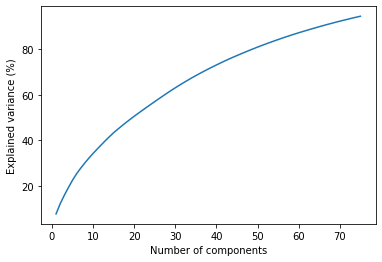

In [47]:
# plot a scree plot
components = len(pca.explained_variance_ratio_) \
    if components is None else components
plt.plot(range(1,components+1),
         np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")


As we can see we can explain about 95% of the varience in the data using 75 principal components. using those 75 components we can train our model
using much less features and therefore:
- train our models much faster.
- avoid to complex model that tend to overfitting.

In [48]:
# extract 75 PC's from our x-features
X_pca = pca.transform(x_features_scaled)
print(X_pca.shape)

(100, 75)


In [49]:
# concanted with the y-label
train_test_data = np.concatenate((X_pca, docs_df.iloc[:,-1:]), axis=1)
train_test_data.shape

(100, 76)

<h3>Visualize the data using T-sne</h3>

In [50]:
tsne = TSNE()
# transform the x- features
X_embedded = tsne.fit_transform(train_test_data[:,:75])

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [51]:
# concanted with the y-label
embedded_df = np.concatenate((X_embedded, docs_df.iloc[:,-1:]), axis=1)

In [52]:
# rename y-col
embedded_df = pd.DataFrame(embedded_df)
embedded_df.rename(columns={2: 'Category'}, inplace=True)

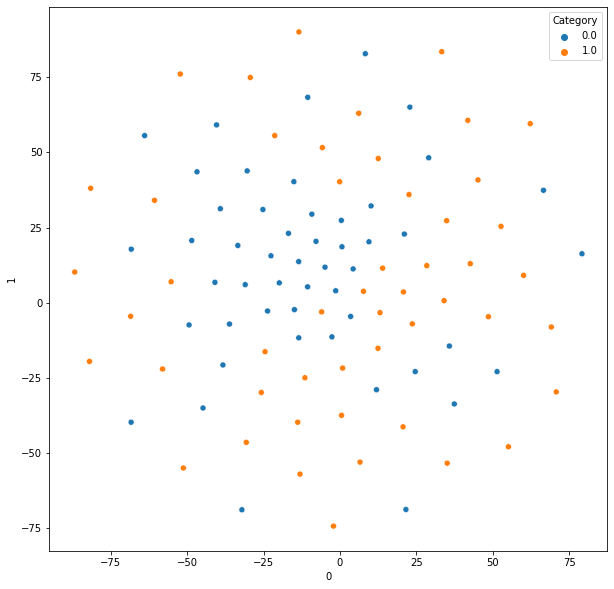

In [53]:
# create plot
plt.figure(figsize=(10, 10))
sns.scatterplot(data=embedded_df, x=0, y=1, hue='Category')

It seems like our categories(belong to explaing AI(1), not belong to explaing Ai(0)), are not linearly separated.

<h3>K-cross validation<h3>

In [54]:
# using k = 10
kcv_list = k_cross_validation(x_features=pd.DataFrame(train_test_data[:,:75]), y_label=docs_df.iloc[:,-1:], k=10)

[ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 58 60 61 62 63 65 66 67 68 69 71 72 73 74 75 76 77
 78 79 80 82 83 84 85 87 89 90 91 92 93 94 95 97 98 99]
[ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 17 18 19 20 21 24 25 26 27
 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 72 73 74 75 76 77
 78 79 80 81 84 85 86 87 88 89 91 92 93 94 96 97 98 99]
[ 0  1  2  3  4  5  6  8  9 10 11 12 15 16 17 18 19 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 45 46 47 48 49 50 51 52 53
 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 75 76 78 80 81
 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]
[ 0  1  2  3  4  7  8 11 12 13 14 15 16 17 19 20 21 22 23 24 25 26 27 28
 29 30 31 32 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48 50 51 52 54 55
 56 57 58 59 60 61 62 63 64 6

<h2>Applying classification models</h2>

<h3>KNN</h3>

In [ ]:
best_classifier_knn = None
best_accu_knn = 0
best_x_test_knn = None
best_y_test_knn = None

for batch in kcv_list:
  x_train = batch[0]
  y_train = batch[1]
  x_test = batch[2]
  y_test = batch[3]
  # normalize x-features
  sc = StandardScaler()
  x_train = sc.fit_transform(x_train)
  x_test = sc.fit_transform(x_test)

  knn = KNeighborsClassifier()

  # define parameter grid
  parameters_grid = {
      'n_neighbors': [ 3, 5, 10],
      'weights': ['uniform', 'distance']
  }

  # define grid search
  grid_search = GridSearchCV(estimator=knn, param_grid=parameters_grid)


  # fit estimator
  grid_search.fit(x_train, y_train)

  # get best estimator
  best = grid_search.best_estimator_

  # predict
  y_pred = best.predict(x_test)


  # calculate accuracy
  acc = round(accuracy_score(y_test, y_pred), 3)

  # update best classifier
  if acc > best_accu_knn:
    best_accu_knn = acc
    best_classifier_knn = best
    best_x_test_knn = x_test
    best_y_test_knn = y_test

<H3>Evaluate the model</H3>

In [56]:
print("KNN best classifier accuracy is {}".format(best_accu_knn))

KNN best classifier accuracy is 0.8


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


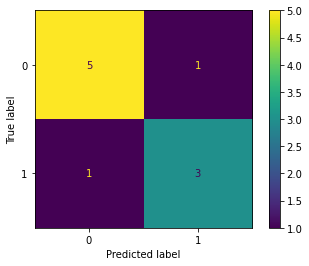

,sensitivity,specificity
0,0.833333,0.750000


In [57]:
# confusion matrix
y_pred = best_classifier_knn.predict(best_x_test_knn)
plot_confusion_matrix(best_classifier_knn, best_x_test_knn, best_y_test_knn)
plt.show()

tp, fn, fp, tn = confusion_matrix(best_y_test_knn, y_pred).ravel()
eval_Df = {"sensitivity": tp/(tp+fn), "specificity": tn/(tn+fp)}
pd.DataFrame(data=eval_Df, index=[0])

<h3>SVM</h3>

In [ ]:
best_classifier_SVM = None
best_accu_SVM = 0
best_x_test_SVM = None
best_y_test_SVM = None

for batch in kcv_list:
  x_train = batch[0]
  y_train = batch[1]
  x_test = batch[2]
  y_test = batch[3]
  # normalize x-features
  sc = StandardScaler()
  x_train = sc.fit_transform(x_train)
  x_test = sc.fit_transform(x_test)

  clf = svm.SVC(random_state=RSEED)

  # define parameter grid
  parameters_grid = {
      'C': [0.1, 0.5,0.7,1.2,1.5,20,40,60],
      'kernel': ['linear', 'poly','rbf', 'sigmoid'],
      'degree': [3,4],

  }

  # define grid search
  grid_search = GridSearchCV(estimator=clf, param_grid=parameters_grid)



  # fit estimator
  grid_search.fit(x_train, y_train)

  # get best estimator
  best = grid_search.best_estimator_

  # predict
  y_pred = best.predict(x_test)


  # calculate accuracy
  acc = round(accuracy_score(y_test, y_pred), 3)

  # update best classifier
  if acc > best_accu_SVM:
    best_accu_SVM = acc
    best_classifier_SVM = best
    best_x_test_SVM = x_test
    best_y_test_SVM = y_test

<H3>Evaluate the model</H3>

In [59]:
print("SVM best classifier accuracy is {}".format(best_accu_SVM))

SVM best classifier accuracy is 0.9


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


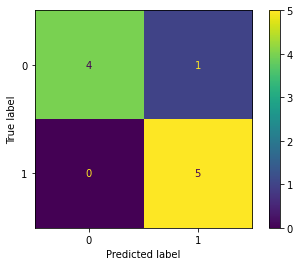

,sensitivity,specificity
0,0.800000,1.000000


In [60]:
# confusion matrix
y_pred = best_classifier_SVM.predict(best_x_test_SVM)
plot_confusion_matrix(best_classifier_SVM, best_x_test_SVM, best_y_test_SVM)
plt.show()

tp, fn, fp, tn = confusion_matrix(best_y_test_SVM, y_pred).ravel()
eval_Df = {"sensitivity": tp/(tp+fn), "specificity": tn/(tn+fp)}
pd.DataFrame(data=eval_Df, index=[0])

<h3>Random Forest</h3>

In [ ]:
best_classifier_RF = None
best_accu_RF = 0
best_x_test_RF = None
best_y_test_RF = None

for batch in kcv_list:
  x_train = batch[0]
  y_train = batch[1]
  x_test = batch[2]
  y_test = batch[3]

  # define model
  rf = RandomForestClassifier(random_state=RSEED)

  # define parameter grid
  parameters_grid = {
      'max_depth': [2, 3, 4, 6],
      'min_samples_split': [2, 4, 8],
      'min_samples_leaf': [2, 8],
      'n_estimators': [50,70,100]
  }
   # define grid search
  grid_search = GridSearchCV(estimator=rf, param_grid=parameters_grid)



  # fit estimator
  grid_search.fit(x_train, y_train)

  # get best estimator
  best = grid_search.best_estimator_

  # predict
  y_pred = best.predict(x_test)


  # calculate accuracy
  acc = round(accuracy_score(y_test, y_pred), 3)

  # update best classifier
  if acc > best_accu_RF:
    best_accu_RF = acc
    best_classifier_RF = best
    best_x_test_RF = x_test
    best_y_test_RF = y_test

<h3>Evaluate the model</h3>

In [65]:
print("Random forest best classifier accuracy is {}".format(best_accu_RF))

Random forest best classifier accuracy is 1.0


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


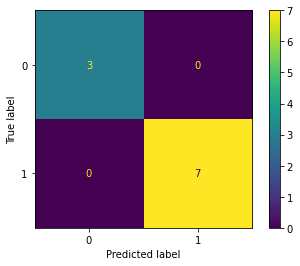

,sensitivity,specificity
0,1.000000,1.000000


In [66]:
# confusion matrix
y_pred = best_classifier_RF.predict(best_x_test_RF)
plot_confusion_matrix(best_classifier_RF, best_x_test_RF, best_y_test_RF)
plt.show()

tp, fn, fp, tn = confusion_matrix(best_y_test_RF, y_pred).ravel()
eval_Df = {"sensitivity": tp/(tp+fn), "specificity": tn/(tn+fp)}
pd.DataFrame(data=eval_Df, index=[0])

<h3>Navie Bayes</h3>

In [ ]:
best_classifier_NB = None
best_accu_NB = 0
best_x_test_NB = None
best_y_test_NB = None

for batch in kcv_list:
  x_train = batch[0]
  y_train = batch[1]
  x_test = batch[2]
  y_test = batch[3]

  # define parameter grid
  param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
  }

  # define and train the model
  grid_search = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, n_jobs=-1)
  grid_search.fit(x_train, y_train)

  # get best estimator
  best = grid_search.best_estimator_

  # predict
  y_pred = best.predict(x_test)


  # calculate accuracy
  acc = round(accuracy_score(y_test, y_pred), 3)

  # update best classifier
  if acc > best_accu_NB:
    best_accu_NB = acc
    best_classifier_NB = best
    best_x_test_NB = x_test
    best_y_test_NB = y_test

<h3>Evaluate the model</h3>

In [62]:
print("Navie Bayes best classifier accuracy is {}".format(best_accu_NB))

Navie Bayes best classifier accuracy is 1.0


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


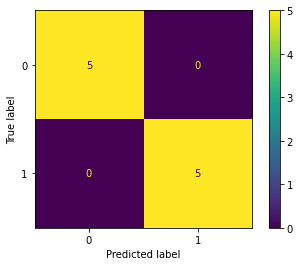

,sensitivity,specificity
0,1.000000,1.000000


In [63]:
# confusion matrix
y_pred = best_classifier_NB.predict(best_x_test_NB)
plot_confusion_matrix(best_classifier_NB, best_x_test_NB, best_y_test_NB)
plt.show()

tp, fn, fp, tn = confusion_matrix(best_y_test_NB, y_pred).ravel()
eval_Df = {"sensitivity": tp/(tp+fn), "specificity": tn/(tn+fp)}
pd.DataFrame(data=eval_Df, index=[0])

<h3>Summery</h3>
Overall it seems that most of the classifiers managed to learn well from<br>
our representaion of the data and achived high accuracy, yet both the KNN and SVM classifiers made mistakes(knn with acurracy-0.8 and SVM with acurracy-0.9).
As we have seen the in the T-SNE visualization in 2D the classes are not linearly seperable, therefor it is possible that in higher dimension of 60(which we perform the calculations on) the classes also  not seperable.<br>
Therefore models like SVM and KNN that their peroformance highly impacted by,<br>  classes that are not linearly separable will performe worser in those cases.
<br>
The random forest and Naive bayse managed to achive the best accuracy(1.0).

In [67]:
# saving the best classifiers of all the 4 models
joblib.dump(best_classifier_knn, '../TrainedClassificationModels/KNN_classifier.pkl')
joblib.dump(best_classifier_SVM, '../TrainedClassificationModels/SVM_classifier.pkl')
joblib.dump(best_classifier_RF, '../TrainedClassificationModels/RF_classifier.pkl')
joblib.dump(best_classifier_NB, '../TrainedClassificationModels//NB_classifier.pkl')

['/content/drive/MyDrive/Colab Notebooks//NB_classifier.pkl']